In [8]:
import pandas as pd
data=pd.read_csv('gender_submission.csv')
second=pd.read_csv('train_titanic.csv')
third=pd.read_csv('test_titanic.csv')


# for the analysis we based on the second file



#CLEANING
second=second.dropna(how='all')
second=second.fillna(0)

In [9]:
second=second.dropna(how='all')
second=second.fillna(0)

In [10]:
second.shape

(891, 12)

In [30]:
#ANALYSIS
print((second['Survived']==1).sum())  #62% of death
print(second['Survived'].count())

second[second['Sex']=='female'].count()




342
891


PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin          314
Embarked       314
dtype: int64

In [34]:
second[second['Sex']=='female']['Pclass'].value_counts()





3    144
1     94
2     76
Name: Pclass, dtype: int64

In [33]:
print(((94/314)*100)) # percentage of women in class 1

29.936305732484076


In [35]:
second[second['Sex']=='male'].count()

second[second['Sex']=='male']['Pclass'].value_counts()

print(((122/577)*100)) # percentage of men in class1

#most women take tcikets from class 1 

21.143847487001732


In [12]:
women = second.loc[second.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
men = second.loc[second.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)
#the women are saved first


% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

display(second.groupby(['Pclass','Sex',])['Age','Fare',].mean())

#more old people choose class 1 because they have generaly more money

# women pay more for tickets because they have class 1 tickets
# men are often older than women



C:\Users\perringaux alice\AppData\Local\Temp\ipykernel_5192\1626343890.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  display(second.groupby(['Pclass','Sex',])['Age','Fare',].mean())


Age        Fare
Pclass Sex                          
1      female  31.297872  106.125798
       male    34.175574   67.226127
2      female  27.967105   21.970121
       male    28.178981   19.741782
3      female  15.406250   16.118810
       male    19.326859   12.661633

In [14]:
second.groupby('Survived')['Age'].mean()
#mean of survivants:23, death: 23  # no corelation with age

Survived
0    23.653005
1    24.034123
Name: Age, dtype: float64

In [81]:
second.groupby('Survived')['Age'].median()
#the older survived more

Survived
0    24.0
1    25.0
Name: Age, dtype: float64

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
display(second.groupby('Pclass')['Age'].median())
#more old people choose class 1 because they have generaly more money

second[second['Age']<100]['Pclass'].value_counts()
#they were more people in class 3

Pclass
1    35.0
2    28.0
3    20.0
Name: Age, dtype: float64

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
second.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

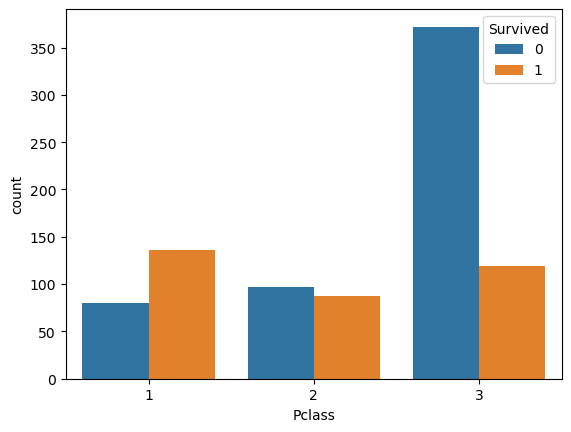

In [17]:
import seaborn as sns
sns.countplot(x="Pclass", hue="Survived", data=second)
#correlation beetween class and survived 
#more dead in class 3 because more people and class 3 was under the boat so more in dange

<Axes: xlabel='Pclass', ylabel='Fare'>

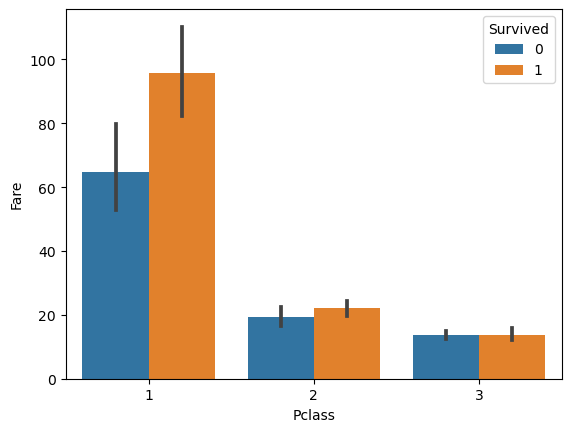

In [18]:

sns.barplot(data=second, x='Pclass', y='Fare', hue='Survived')
#the first class is the most expensive
#correlation beetween fare, class and survived
#those who survived in class 1 have maye paid even more for the ticket, maybe even more expensive cabins.


In [83]:
display(second.groupby('Embarked')['Survived'].mean())
#more chance to survive for embarked c

a = second.groupby(['Embarked', 'Pclass']).size().reset_index(name='Count')

print(a)
#19percent for S for access class1 
#50 percent of access of class 1 for C embarked 


Embarked
0    1.000000
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

  Embarked  Pclass  Count
0        0       1      2
1        C       1     85
2        C       2     17
3        C       3     66
4        Q       1      2
5        Q       2      3
6        Q       3     72
7        S       1    127
8        S       2    164
9        S       3    353


In [96]:
number_people_class1 = train["Pclass"].value_counts()[1]
print("Number people in class 1 : ",number_people_class1)
number_people_class2 = train["Pclass"].value_counts()[2]
print("Number people in class 2 : ",number_people_class2)
number_people_class3 = train["Pclass"].value_counts()[3]
print("Number people in class 3 : ",number_people_class3)

Number people in class 1 :  216
Number people in class 2 :  184
Number people in class 3 :  491


In [87]:
print(second.loc[(second["Embarked"] == 'C') & (second["Pclass"] == 1) ].count()["Embarked"])

85


In [95]:
print((second["Pclass"] == 1).count())

891


In [97]:
print(second.loc[(second["Embarked"] == 'C') & (second["Pclass"] == 1) & (second["Survived"]==1)].count()["Embarked"])
print(59*100/85)
#percentage of survivants in class 1 where embarked in C 
#more survivant in class 1 than class2 


59
69.41176470588235


In [90]:
print(second.loc[(second["Embarked"] == 'C') & (second["Pclass"] == 2)].count()["Embarked"])

17


In [99]:
print(second.loc[(second["Embarked"] == 'C') & (second["Pclass"] == 2) & (second["Survived"]==1)].count()["Embarked"])
print(9*100/17) #percentage of survivants in class 2 where embarked in C 

9
52.94117647058823


In [105]:
print(second.loc[(second["Embarked"] == 'S') & (second["Pclass"] == 1)].count()["Embarked"])

127


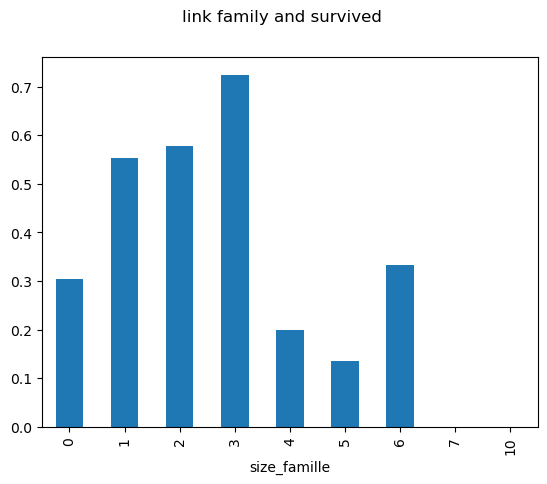

In [56]:
second[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# the most people that are suscptible to survived are the ones that have brother or sister


# In[45]:


second['size_famille']=second['SibSp']+second['Parch']
plt.figure()
second[['size_famille','Survived']].groupby('size_famille')['Survived'].mean().plot(kind='bar')
plt.suptitle('link family and survived')

plt.show()
#the family of 3 had the more chance to survive


In [62]:
enfant=second.loc[second['Age']<18].count()["Age"]
print(enfant

290


In [69]:
enfants_survecus = second.loc[(second['Age'] < 18) & (second['Survived'] == 1) ].count()["Age"]
print(enfants_survecus)
print("pourcentage enfant survecu ")
print(113*100/290)

113
pourcentage enfant survecu 
38.96551724137931


In [76]:
enfants_class1 = second.loc[(second['Age'] < 18) & (second['Pclass'] == 1) ].count()["Age"]
print(enfants_class1)
enfants_class2 = second.loc[(second['Age'] < 18) & (second['Pclass'] == 2) ].count()["Age"]
print(enfants_class2)
enfants_class3 = second.loc[(second['Age'] < 18) & (second['Pclass'] == 3) ].count()["Age"]
print(enfants_class3)

42
34
214


42


In [78]:
enfants_survecus1 = second.loc[(second['Age'] < 18) & (second['Survived'] == 1) & (second['Pclass']==1)].count()["Age"]
print(enfants_survecus1)# 25 childreen save for class1
enfants_survecus2 = second.loc[(second['Age'] < 18) & (second['Survived'] == 1) & (second['Pclass']==2)].count()["Age"]
print(enfants_survecus2) #25 childreen save for class2
enfants_survecus3 = second.loc[(second['Age'] < 18) & (second['Survived'] == 1) & (second['Pclass']==3)].count()["Age"]
print(enfants_survecus3)#63 childreen save for class3

25
25
63


In [77]:
print("percentage class1 childreen survived=")
print(25*100/42)

percentage class1 childreen=
59.523809523809526


In [79]:
print("percentage class2 childreen survived=")
print(25*100/34)

percentage class2 childreen survived=
73.52941176470588


In [80]:
print("percentage class3 childreen survived=")
print(63*100/214)

percentage class3 childreen survived=
29.439252336448597


In [ ]:

conca[conca['Age']<1000].groupby(['Sex','Pclass']).mean()
#tableau recap

In [54]:
print(second)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [53]:

#Bon OK

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# import file
train_data = pd.read_csv("train_titanic.csv")
test_data = pd.read_csv("test_titanic.csv")
train_data['Sex'] =train_data['Sex'].replace('male', 1).replace('female', 0) 
test_data['Sex'] =test_data['Sex'].replace('male', 1).replace('female', 0)  
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix='Embarked')
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix='Embarked')

submission_data = pd.read_csv("titanic_gendersubmission.csv")

# Concatenate training and test data
all_data = pd.concat([train_data, test_data])
all_data["Age"] = all_data["Age"].fillna(all_data["Age"].median())
# Prétraiter les données (supprimer les colonnes inutiles, remplir les valeurs manquantes, etc.)

# Separate training and test data
train = all_data.iloc[:len(train_data)]
test = all_data.iloc[len(train_data):]

# Separate training data into features and target
X = train.drop(["Name","Survived", "PassengerId","Ticket","Cabin"], axis=1)
y = train["Survived"]

# Split training data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

# Define the GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Train the model using GridSearchCV to perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the performance of the model on the validation set
y_val_pred = grid_search.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


from sklearn.ensemble import RandomForestClassifier
newsecond=second
newthird=third
y = newsecond["Survived"]
newsecond=pd.get_dummies(newsecond, columns=['Embarked'], prefix='Embarked')
newthird=pd.get_dummies(newthird, columns=['Embarked'], prefix='Embarked')
features = ["Pclass","Age", "Sex", "SibSp", "Parch",  "Embarked_C","Embarked_Q",  "Embarked_S" ]   

X = pd.get_dummies(newsecond[features])
X_test = pd.get_dummies(newthird[features])
X["Age"].fillna(X["Age"].median(), inplace=True)
X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': third.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")




C:\Users\perringaux alice\miniconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\perringaux alice\miniconda3\envs\py38_1\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

Best hyperparameters:  {'C': 0.1}
Accuracy: 0.7988826815642458
Your submission was successfully saved!


In [35]:
import numpy as np

def Survived(model, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_C, Embarked_Q, Embarked_S):
    x = np.array([Pclass, Sex, Age, SibSp, Parch, Fare, Embarked_C, Embarked_Q, Embarked_S]).reshape(1, -1)
    prediction = model.predict(x)
    probability = model.predict_proba(x)
    print("Prediction:", prediction)
    print("Probabilities:", probability)
Survived(model, 1, 1, 35, 1, 2, 300, 0, 1, 0)    

Prediction: [1.]
Probabilities: [[0.4931501 0.5068499]]


C:\Users\perringaux alice\miniconda3\envs\py38_1\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\perringaux alice\miniconda3\envs\py38_1\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [51]:
test_data = pd.read_csv("test_titanic.csv")

# Prétraitement des données de test
test_data['Sex'] = test_data['Sex'].replace('male', 1).replace('female', 0)

# Vérifier la présence de la colonne "Embarked" dans les données de test
if 'Embarked' in test_data.columns:
    test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix='Embarked')

test_data["Age"] = test_data["Age"].fillna(test_data["Age"].median())

# Vérifier et remplacer les valeurs manquantes dans les données de test
test_data.fillna(0, inplace=True)

X_test = test_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
y_true = true_labels["Survived"]

# Faire les prédictions sur les données de test
predictions = model.predict(X_test)

# Calculer l'accuracy du modèle en comparant les prédictions avec les vraies valeurs de survie
accuracy = accuracy_score(y_true, predictions)

print("Accuracy:", accuracy)


Accuracy: 0.9473684210526315
